In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
# 倒入一些必要的库


In [ ]:
#df1 = pd.read_csv('/content/成交量.csv',encoding='gbk')
#df2 = pd.read_csv('/content/振幅.csv',encoding='gbk')
#df3 = pd.read_csv('/content/换手率.csv',encoding='gbk')
df4 = pd.read_csv('/content/涨跌幅.csv',encoding='gbk')
# df5 = pd.read_csv('/content/最低价.csv',encoding='gbk')
# df6 = pd.read_csv('/content/最高价.csv',encoding='gbk')
df7 = pd.read_csv('/content/收盘价.csv',encoding='gbk')
#df8 = pd.read_csv('/content/第二天涨跌幅.csv',encoding='gbk')
df4.head()
1 2 3 4 5 6 7
window = 3

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 1,日期,Date,2010/1/4,2010/1/5,2010/1/6,2010/1/7,2010/1/8,2010/1/11,2010/1/12,2010/1/13,2010/1/14,2010/1/15,2010/1/18,2010/1/19,2010/1/20,2010/1/21,2010/1/22,2010/1/25,2010/1/26,2010/1/27,2010/1/28,2010/1/29,2010/2/1,2010/2/2,2010/2/3,2010/2/4,2010/2/5,2010/2/8,2010/2/9,2010/2/10,2010/2/11,2010/2/12,2010/2/22,2010/2/23,2010/2/24,2010/2/25,2010/2/26,2010/3/1,...,2019/11/6,2019/11/7,2019/11/8,2019/11/11,2019/11/12,2019/11/13,2019/11/14,2019/11/15,2019/11/18,2019/11/19,2019/11/20,2019/11/21,2019/11/22,2019/11/25,2019/11/26,2019/11/27,2019/11/28,2019/11/29,2019/12/2,2019/12/3,2019/12/4,2019/12/5,2019/12/6,2019/12/9,2019/12/10,2019/12/11,2019/12/12,2019/12/13,2019/12/16,2019/12/17,2019/12/18,2019/12/19,2019/12/20,2019/12/23,2019/12/24,2019/12/25,2019/12/26,2019/12/27,2019/12/30,2019/12/31
0,涨跌幅,pct_chg,安捷伦科技(AGILENT),A.N,0.740264,-1.086262,-0.355297,-0.129660,-0.032457,0.064935,-1.200519,0.788177,1.498860,-2.311396,NaN,1.215905,-0.551948,-0.359125,-4.423329,0.959890,-0.543294,-0.409696,-1.645526,-2.300453,3.924367,1.270168,0.135593,-1.591063,0.343997,0.102845,0.719178,-0.544033,0.376068,2.111717,-0.160256,-0.963082,1.231767,-0.448287,1.190093,2.002543,...,0.317670,0.158332,0.961665,0.274008,0.260247,0.142764,-0.518403,1.954143,-0.408893,1.732102,-0.971119,-0.280183,1.047254,1.440849,0.859706,0.160593,NaN,-0.382338,-0.519995,-0.311139,1.036205,0.741381,0.834049,-0.717674,1.604999,0.590860,1.666267,-1.297017,0.884004,-0.592066,-0.619416,1.294498,0.804639,0.082169,0.046915,NaN,0.175850,-0.035108,-0.398876,0.482921
1,NaN,NaN,美国航空,AAL.O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.705581,-0.226098,-0.420848,-0.552666,-3.497875,-2.913279,0.383810,0.312826,-0.900901,2.412587,-3.618983,-1.062699,2.685285,1.080893,0.206968,-0.344234,NaN,-0.725389,-2.296451,-2.813390,0.329791,-0.511322,1.780470,-0.847610,-1.782466,-0.518519,3.201787,-0.865801,1.601164,1.289398,-0.990099,1.964286,1.716287,0.895317,-0.409556,NaN,1.679232,-4.145602,-0.492264,1.342756
2,NaN,NaN,领先汽车配件,AAP.N,-0.247036,-0.594354,0.871948,-0.024697,0.395257,-0.984252,-1.739563,1.390996,-1.322025,-0.631951,NaN,0.483338,-0.860759,0.178754,1.300025,1.912431,0.123457,0.098644,-2.020202,-0.804627,2.636248,1.728822,0.000000,-0.631221,-0.513071,0.221022,1.862289,1.828242,0.519726,0.611046,0.600000,-0.049702,0.596718,0.667326,0.171863,1.225490,...,0.927798,-0.247496,-1.110586,0.848268,-7.510958,1.562700,-1.103544,3.717401,0.620927,-1.032566,-0.148166,-2.108322,-0.290532,0.810794,-1.294376,1.075816,NaN,-1.070664,-0.337408,-2.516768,-0.183474,-0.026259,1.529976,-1.972578,3.034901,-0.172889,0.141116,-0.582885,-1.101733,2.918567,0.031650,-0.943220,1.048057,1.169997,0.375070,NaN,-0.809616,-0.577635,0.486265,0.653595
3,NaN,NaN,苹果公司(APPLE),AAPL.O,1.555530,0.172889,-1.590633,-0.184860,0.664830,-0.882159,-1.137499,1.410553,-0.579160,-1.671203,NaN,4.423833,-1.541574,-1.725351,-4.960783,2.692794,1.410809,0.943964,-4.134036,-3.626374,1.388607,0.580291,1.720617,-3.603875,1.775579,-0.685562,1.066351,-0.547429,1.821481,0.860724,-0.621808,-1.675016,1.825342,0.669803,1.297030,2.135666,...,0.042780,1.154136,0.273677,0.791881,-0.091533,0.958162,-0.691950,1.187938,0.504214,-0.303257,-1.164144,-0.448345,-0.087783,1.753381,-0.780869,1.343221,NaN,-0.220281,-1.156221,-1.783010,0.882636,1.467105,1.931621,-1.400022,0.584445,0.852950,0.254829,1.359316,1.711794,0.196527,-0.238936,0.100093,-0.207128,1.631835,0.095070,NaN,1.984029,-0.037943,0.593513,0.730653
4,NaN,NaN,艾伯维(ABBVIE),ABBV.N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.293255,-0.085283,3.901963,0.528107,0.910577,0.254512,1.119317,1.141162,0.112829,0.326834,-2.044484,-0.779817,-0.543227,1.987217,-0.045579,0.695394,NaN,-0.679271,-0.797903,-1.240951,1.454334,-0.550459,0.299815,-0.620832,0.138825,0.161738,2.341407,-1.003043,1.810109,0.7

In [ ]:
#data1 = df1.iloc[0,4:]
#data2 = df2.iloc[0,4:]
#data3 = df3.iloc[0,4:]
data4 = df4.iloc[0,4:-1]
# data5 = df5.iloc[0,4:]
# data6 = df6.iloc[0,4:]
data7 = df7.iloc[0,5:]
#data8 = df8.iloc[0,4:]
data4.head()

2010/1/4    0.740264
2010/1/5    -1.08626
2010/1/6   -0.355297
2010/1/7    -0.12966
2010/1/8   -0.032457
Name: 0, dtype: object

In [ ]:
#data1 = (data1).fillna(np.mean(data1))
#data2 = (data2).fillna(np.mean(data2))
#data3 = (data3).fillna(np.mean(data3))
data4 = (data4).fillna(np.mean(data4))
# data5 = (data5).fillna(np.mean(data5))
# data6 = (data6).fillna(np.mean(data6))
data7 = (data7).fillna(np.mean(data7))
#data8 = (data8).fillna(np.mean(data8))

In [ ]:
data = pd.DataFrame({  
    #'成交量': list(data1),
    #'振幅 ':  list(data2),
    #'换手率': list(data3),
    '涨跌幅': list(data4),
    # '最低价': data5,
    # '最高价': data6,
    '收盘价': list(data7),
    #'第二天涨跌幅': list(data8),

})

data.head()

,涨跌幅,收盘价
0,0.740264,30.96
1,-1.086262,30.85
2,-0.355297,30.81
3,-0.129660,30.80
4,-0.032457,30.82


In [ ]:
# -*- coding: utf-8 -*-
# coding: utf-8
#-*- coding : utf-8 -*-
feanum=2#一共有多少特征
window=5#时间窗设置


In [ ]:
from sklearn import preprocessing#进行归一化操作
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(data)
df = pd.DataFrame(df0, columns=data.columns)
df.head()

,涨跌幅,收盘价
0,0.516056,0.068228
1,0.435864,0.066347
2,0.467956,0.065663
3,0.477863,0.065492
4,0.482130,0.065834


In [ ]:
#技术问题 重新对列做一个排序
# order = ['开盘', '最高', '最低', '涨幅','振幅', '总手', '金额','换手%','成交次数','收盘']
# df = df[order]
# df.tail()

In [ ]:
#这一部分在处理数据 将原始数据改造为LSTM网络的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.values #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum
1

In [ ]:
range(len(data) - sequence_length)

range(0, 2425)

In [ ]:
range(len(data) - sequence_length)

range(0, 2424)

In [ ]:
1 2 6 7 
1 3 

3 5
4 6
5 7


cut=10#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [ ]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2414, 5, 2)
y_train (2414,)
X_test (10, 5, 2)
y_test (10,)


In [ ]:
#建立、训练模型过程
d = 0.0001
model = Sequential()#建立层次模型
model.add(LSTM(64, input_shape=(window, feanum), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(LSTM(16, input_shape=(window, feanum), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(4,kernel_initializer='uniform',activation='relu'))   #建立全连接层     
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs =500, batch_size = 256) #训练模型nb_epoch次

Epoch 1/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 4.1425e-04
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 4.1425e-04
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1788 - accuracy: 4.1425e-04
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1499 - accuracy: 4.1425e-04
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1013 - accuracy: 4.1425e-04
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 4.1425e-04
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 4.1425e-04
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 4.1425e-04
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0512 - accuracy: 4.1425e-04
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss:

In [ ]:
#总结模型
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 64)             17152     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 22,409
Trainable params: 22,409
Non-trainable params: 0
__________________________________________________

In [ ]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)[:,0]
y_train=y_train

Text(0.5, 1.0, 'Train Data')

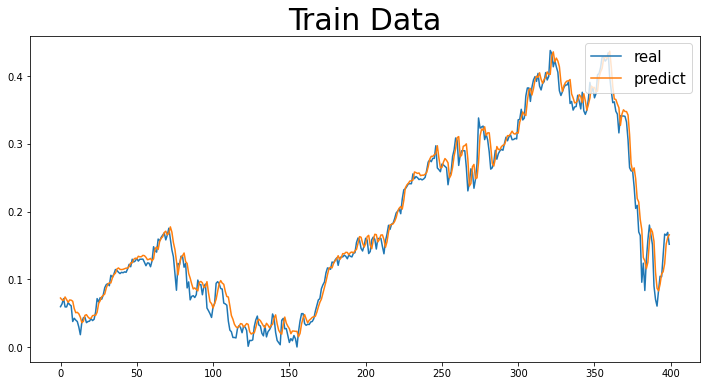

In [ ]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[0:400,0].plot(figsize=(12,6))
draw.iloc[0:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
# 展示在训练集上的表现

In [ ]:
#在测试集上的预测
y_test_predict=model.predict(X_test)[:,0]
y_test=y_test

Text(0.5, 1.0, 'Test Data')

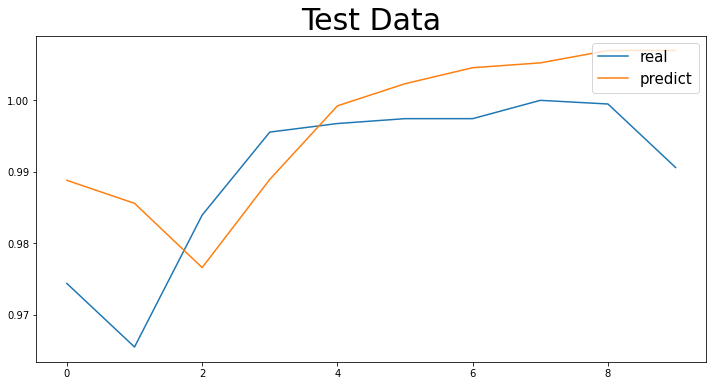

In [ ]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [ ]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.5869334091049121
0.3518962937667247
nan
测试集上的MAE/MSE/MAPE
0.5941531335227688
0.35380077137243404
inf
预测涨跌正确: 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
